In [1]:
from IPython.display import Audio

In [2]:
import numpy as np
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*440*np.sin(10*t**2))
data= np.sin(2*np.pi*440*t)

In [3]:
import wave
import struct
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
waveobj = wave.open("funky.wav",mode='wb')
waveobj.setnchannels(1)
waveobj.setframerate(framerate)
waveobj.setsampwidth(2)
waveobj.setcomptype('NONE','NONE')
waveobj.writeframes(b''.join([struct.pack('<h',x) for x in scaled]))
waveobj.close()

Audio("funky.wav")

In [23]:
CHANNELS = 1
swidth = 2
Change_RATE = 4

spf = wave.open('funky.wav', 'rb')
RATE=spf.getframerate()
signal = spf.readframes(-1)

wf = wave.open('changed.wav', 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(swidth)
wf.setframerate(RATE*Change_RATE)
wf.writeframes(signal)
wf.close()
Audio("changed.wav")

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
from scipy.signal import chirp, sweep_poly

In [26]:
t = np.linspace(0, 10, 5001)
w = chirp(t, f0=12.5, f1=2.5, t1=10, method='linear')


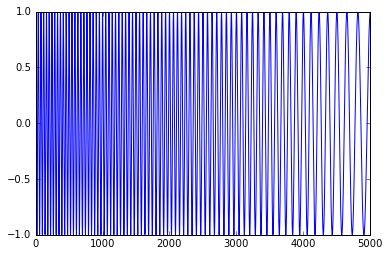

In [27]:
plt.plot(w)

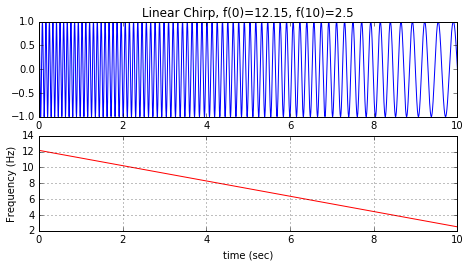

In [28]:
#https://scipy.github.io/old-wiki/pages/Cookbook/FrequencySweptDemo.html

f0=12.15
f1=2.5
t1=10


from pylab import figure, plot, show, xlabel, ylabel, subplot, grid, title, yscale, savefig, clf

FIG_SIZE = (7.5, 3.75)
figure(1, figsize=FIG_SIZE)

t = np.linspace(0, t1, 5001)
w = chirp(t, f0=f0, f1=f1, t1=t1, method='linear')

    
clf()

plt.subplot(2,1,1)
plot(t, w)
tstr = "Linear Chirp, f(0)=%g, f(%g)=%g" % (f0, t1, f1)
title(tstr)

subplot(2,1,2)
plot(t, f0 + (f1-f0)*t/t1, 'r')
grid(True)
ylabel('Frequency (Hz)')
xlabel('time (sec)')

In [ ]:
!conda install librosa
import librosa

Using Anaconda Cloud api site https://api.anaconda.org
Fetching package metadata: ...

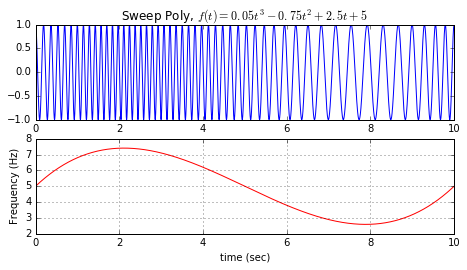

In [36]:
from numpy import poly1d
p = poly1d([0.05, -0.75, 2.5, 5.0])

t = np.linspace(0, t1, 5001)
w = sweep_poly(t, p)
figure(1, figsize=FIG_SIZE)
clf()

subplot(2,1,1)
plot(t, w)
tstr = "Sweep Poly, $f(t) = 0.05t^3 - 0.75t^2 + 2.5t + 5$"
title(tstr)

subplot(2,1,2)
plot(t, p(t), 'r')
grid(True)
ylabel('Frequency (Hz)')
xlabel('time (sec)')

In [38]:
#https://github.com/HelsinkiHacklab/ledmatrix/blob/master/pyaudio_tests/chirp.py
import scipy
from scipy.io.wavfile import write
from scipy.signal import chirp, sweep_poly
sampleRate=44100

chirp_start_hz = 50.0
chirp_end_hz = 12000.0
chirp_time_s = 1.0

xx=np.linspace(0, chirp_time_s, sampleRate)

sampletimes = np.linspace(0.0, chirp_time_s, chirp_time_s*sampleRate)
chirpdata = scipy.signal.chirp(sampletimes, chirp_start_hz, chirp_time_s, chirp_end_hz)
audio_chirp = np.interp(chirpdata, [-1.0, 1.0], [-1*2**15, 2**15-1]).astype(np.int16)

write('test.wav', sampleRate, audio_chirp)
Audio("test.wav")

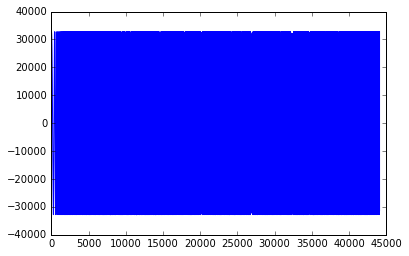

In [39]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('test.wav')
times = np.arange(len(data))/float(samplerate)

plt.plot(data)

ValueError: x and y must have same first dimension

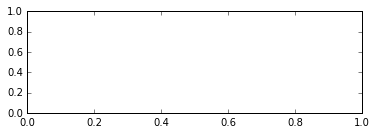

In [32]:
from pylab import figure, plot, show, xlabel, ylabel, subplot, grid, title, yscale, savefig, clf
clf()
#w = chirp(t, f0=f0, f1=f1, t1=t1, method='linear')
plt.subplot(2,1,1)

plot(sampleRate, chirpdata)
#tstr = "Linear Chirp, f(0)=%g, f(%g)=%g" % (f0, t1, f1)
#title(tstr)

subplot(2,1,2)
plot(sampleRate,chirp_start_hz+ (chirp_end_hz-chirp_start_hz)*chirpdata/chirp_time_s, 'r')
grid(True)
ylabel('Frequency (Hz)')
xlabel('time (sec)')

In [31]:
S, freqs, bins, im = plt.specgram(x, NFFT=1024, Fs=fs, noverlap=512)

# Plot a spectrogram
plt.xlabel('Time')
plt.ylabel('Frequency')

NameError: name 'x' is not defined

In [ ]:
!pip install chirp
#deprecated?